# Exploratory Data Analysis

With the preprocessed dataset, I'll go through some visualization in order to find the correlation between the different features so I can select the ones that are strongly related to the target(travel_time).

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [49]:
df = pd.read_csv("preprocessed_data.csv")

In [50]:
df.head()

,Unnamed: 0,speed,travel_time,distance,rating,rating_weather,car_or_bus,day,hour
0,0,19.210586,8.282933,2.652,3,0,1,5,7
1,1,30.848229,10.289083,5.290,3,0,1,5,13
2,2,13.560101,4.061917,0.918,3,0,2,2,5
3,3,19.766679,23.372667,7.700,3,0,2,2,5
4,4,25.807401,9.288033,3.995,2,0,1,4,15


In [51]:
df = df.drop("Unnamed: 0", axis=1)

In [42]:
df.car_or_bus.value_counts()

1    76
2    70
Name: car_or_bus, dtype: int64

In [43]:
pd.pivot_table(df, index = "car_or_bus", values = "speed") #Remember: car = 1; bus = 2

,speed
car_or_bus,
1,19.124326
2,11.844696


In [53]:
df = df.rename({"rating":"traffic_rating"}, axis=1)

In [7]:
df_features = df[["traffic_rating","rating_weather","car_or_bus","day","hour"]]

Graph for traffic_rating


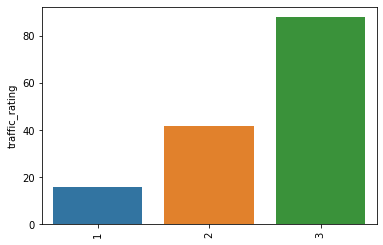

Graph for rating_weather


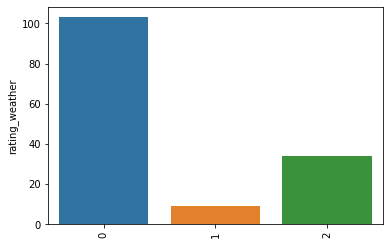

Graph for car_or_bus


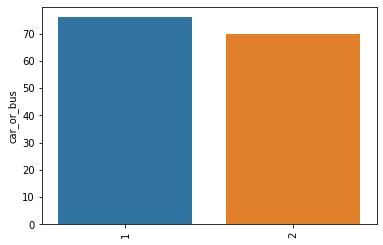

Graph for day


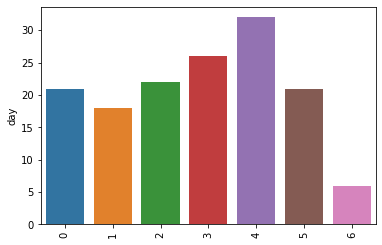

Graph for hour


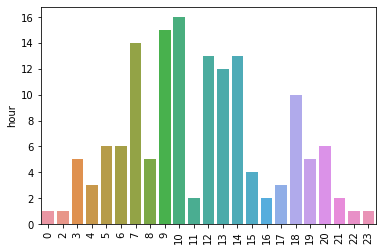

In [8]:
for i in df_features.columns:
    feature = df[i].value_counts()
    print(f'Graph for {i}')
    chart = sns.barplot(x=feature.index, y=feature)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Null Values Removal 

Sadly, the bar graphs show that most of the "rating_weather" are null (equal to 0), so I will first assess whether there is a correlation between the variable and the target to determine if it is worth keeping; if not, the column will be removed.

In [10]:
df.rating_weather.value_counts()

0    103
2     34
1      9
Name: rating_weather, dtype: int64

In [54]:
df_wo_weather = df[df.rating_weather != 0]

In [55]:
df_wo_weather.corr()

,speed,travel_time,distance,traffic_rating,rating_weather,car_or_bus,day,hour
speed,1.000000,0.514209,0.853343,-0.164327,0.077710,NaN,-0.165741,-0.169030
travel_time,0.514209,1.000000,0.802489,-0.113559,-0.005481,NaN,-0.150723,-0.221553
distance,0.853343,0.802489,1.000000,-0.110967,0.079027,NaN,-0.125550,-0.227710
traffic_rating,-0.164327,-0.113559,-0.110967,1.000000,0.484468,NaN,0.053640,-0.146529
rating_weather,0.077710,-0.005481,0.079027,0.484468,1.000000,NaN,0.043384,-0.108698
car_or_bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.165741,-0.150723,-0.125550,0.053640,0.043384,NaN,1.000000,-0.383624
hour,-0.169030,-0.221553,-0.227710,-0.146529,-0.108698,NaN,-0.383624,1.000000


In [56]:
df_wo_weather.head()

,speed,travel_time,distance,traffic_rating,rating_weather,car_or_bus,day,hour
72,8.985648,0.240383,0.036,1,1,2,3,12
74,3.456442,0.260383,0.015,3,1,2,3,14
75,1.580681,0.303667,0.008,3,2,2,3,14
78,1.022909,0.469250,0.008,3,1,2,1,18
83,23.784877,15.990833,6.339,1,2,2,2,10


In [15]:
df_wo_weather.car_or_bus.value_counts()

2    43
Name: car_or_bus, dtype: int64

In [57]:
model_df = df.drop("rating_weather", axis=1)

Not only does "rating weather" have no correlation with travel time, but also the remaining data, when null values are removed, correspond only to buses. *Which is interesting, because it implies that only bus passengers evaluated the weather*. 

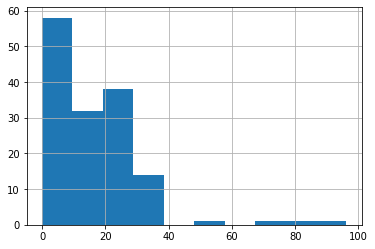

In [58]:
model_df.speed.hist()

## Outliers Removal

The speed histogram indicates that there are some values outside the main body of the data. This can be the result of a bad data collection or just some folks going at high speed in the city. Either way, for better accuracy in the final model, outliers shall be removed.

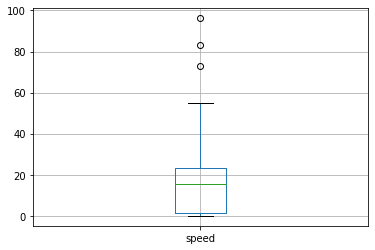

In [18]:
model_df.boxplot(column = "speed")

In [19]:
model_df["speed"].describe()

count    146.000000
mean      15.634092
std       15.247806
min        0.009779
25%        1.455779
50%       15.507826
75%       23.162342
max       96.206029
Name: speed, dtype: float64

In [59]:
model_df = model_df[model_df.speed <= 40]

**Note:** the "speed" column was useful for finding outliers and pointing out other important traffic data. However, since calculting the travel time already knowing the distance and speed is fairly easy, I'll remove this feature.

In [60]:
model_df = model_df.drop("speed", axis=1)

## Heat Map and Correlation

I'll use the seaborn.heatmap() function to find the relationship between the different variables in the dataset. Even though there are other methods relate independent features directly to the target, this dataset is really small and therefore a heatmap is good for visualization and helps to quickly find the Pearson's correlation coefficient.

* **Note:** Predict the travel time with with a given distance and speed would be really easy, so I'll not consider the "speed" column for the correlations. However, speed was really useful for finding the outliers and it makes sense to include some tables with the relation between speed and other features in the final documentation.

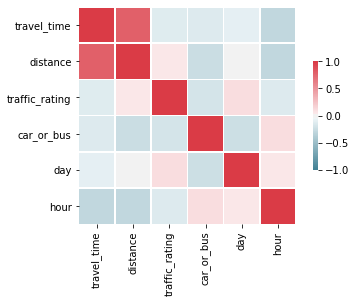

In [61]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(model_df.corr(),vmax=1, vmin=-1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
model_df.corr()

,travel_time,distance,traffic_rating,car_or_bus,day,hour
travel_time,1.000000,0.795406,-0.121910,-0.125178,-0.087695,-0.283104
distance,0.795406,1.000000,0.062141,-0.241397,-0.037462,-0.281831
traffic_rating,-0.121910,0.062141,1.000000,-0.186808,0.113586,-0.126243
car_or_bus,-0.125178,-0.241397,-0.186808,1.000000,-0.222882,0.109466
day,-0.087695,-0.037462,0.113586,-0.222882,1.000000,0.061339
hour,-0.283104,-0.281831,-0.126243,0.109466,0.061339,1.000000


* Normally, it would be a good idea to remove the features with a correlation coefficient lower than .10. However, since this is a very small dataset, I'd like to keep the "day" data. 

In [63]:
model_df.head()

,travel_time,distance,traffic_rating,car_or_bus,day,hour
0,8.282933,2.652,3,1,5,7
1,10.289083,5.290,3,1,5,13
2,4.061917,0.918,3,2,2,5
3,23.372667,7.700,3,2,2,5
4,9.288033,3.995,2,1,4,15


In [64]:
model_df.to_csv("eda_data.csv")